In [2]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [3]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
from deprecated.Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline, ChipResonatorsTwoTlines, ChipResonatorsThreeTlines
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

Permeability and thickness heterostructure

In [4]:
epsilon_r = [11.9]
thickness_subs = [525e-6]

In [5]:
Lk = 100e-15

Feedline

In [83]:
FeedlineWidth = 20
FeedlineLength  = 4300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=Lk), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=Lk, length_CPW=(FeedlineLength + FeedlineTaperLength + BondpadLength)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.361087063625966 Ohm
Frequency of the feedline is 3.0082117882781736 GHz


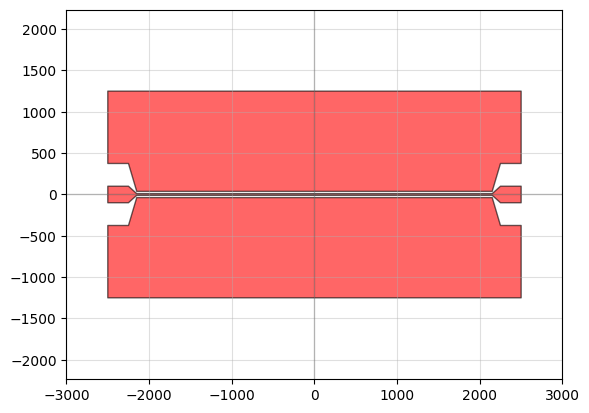

'C:\\Users\\localadmin\\Documents\\GitHub\\resonators\\gds_files\\20241216_SiRes-Al\\Tline_rightsize.gds'

In [84]:


ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 2500]

_, _, TLine = ChipTline(ChipSize,
                          FeedlineWidth, 
                          FeedlineLength, 
                          FeedlineGap, 
                          FeedlineTaperLength, 
                          BondpadWidth, 
                          BondpadLength, 
                          BondpadGap)
qp(TLine)
TLine.write_gds(r"C:\Users\localadmin\Documents\GitHub\resonators\gds_files\20241216_SiRes-Al\Tline_rightsize.gds")

## Resonators 

#### 4 resonators

Resonator 1
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 208.4116944296819 fF
 Cc: 0.897486035281895 fF
Resonator 2
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 132.6256237279794 fF
 Cc: 0.897486035281895 fF
Resonator 3
 Geometric: 5.853530821409309 nH/m
 Kinetic: 0.8616666666666668 nH/m
 Ltot: 6.715197488075976 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 4
 Geometric: 4.73348684815988 nH/m
 Kinetic: 0.6966666666666667 nH/m
 Ltot: 5.430153514826547 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Inductor total length is [5995. 5995. 5170. 4180.]
The frequencies are [np.float64(3.9424565146103503), np.float64(4.936087289185065), np.float64(6.28048944510757), np.float64(6.984202631226809)]


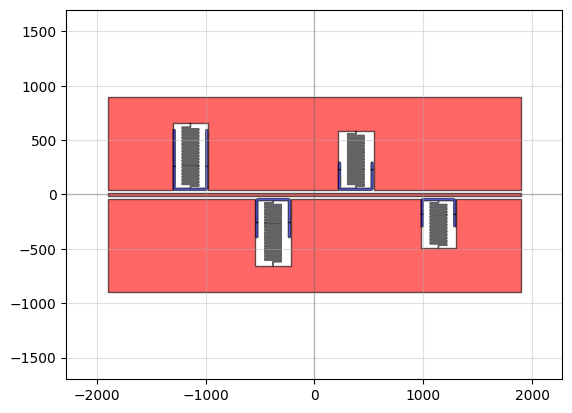

In [47]:
NumberOfResonators = int(4)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[550,350,250,250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35,35,30,24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
FeedlineLength = 3800
ChipSize = [FeedlineLength, 1800] 

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

#chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/20241216_SiRes-Al/si_al_4resonator.gds")
qp(chip)

### more resonators

Resonator 1
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 170.51865907883064 fF
 Cc: 0.897486035281895 fF
Resonator 2
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 132.6256237279794 fF
 Cc: 0.897486035281895 fF
Resonator 3
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 4
 Geometric: 5.853530821409309 nH/m
 Kinetic: 0.8616666666666668 nH/m
 Ltot: 6.715197488075976 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 5
 Geometric: 5.293508834784594 nH/m
 Kinetic: 0.7791666666666667 nH/m
 Ltot: 6.07267550145126 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 6
 Geometric: 4.73348684815988 nH/m
 Kinetic: 0.6966666666666667 nH/m
 Ltot: 5.430153514826547 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Inductor total length is [5995. 5995. 

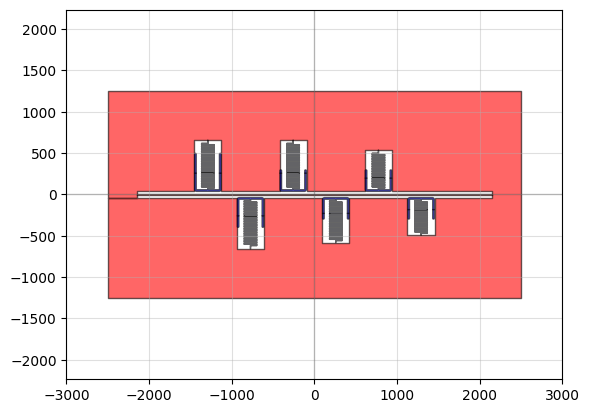

In [80]:
NumberOfResonators = int(6)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350,250, 250, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35,35,35, 30,27, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
FeedlineWidth = 20
FeedlineLength  = 4300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 2500]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/20241216_SiRes-Al/si_al_6resonator.gds")
qp(chip)

## Chip

Resonator 1
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 208.4116944296819 fF
 Cc: 0.897486035281895 fF
Resonator 2
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 132.6256237279794 fF
 Cc: 0.897486035281895 fF
Resonator 3
 Geometric: 5.853530821409309 nH/m
 Kinetic: 0.8616666666666668 nH/m
 Ltot: 6.715197488075976 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 4
 Geometric: 4.73348684815988 nH/m
 Kinetic: 0.6966666666666667 nH/m
 Ltot: 5.430153514826547 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Inductor total length is [5995. 5995. 5170. 4180.]
The frequencies are [np.float64(3.9424565146103503), np.float64(4.936087289185065), np.float64(6.28048944510757), np.float64(6.984202631226809)]


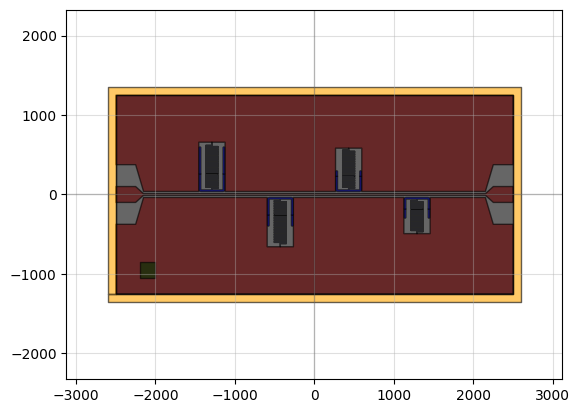

In [ ]:
NumberOfResonators = int(4)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[550,350,250,250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35,35,30,24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
#feedline
FeedlineWidth = 20
FeedlineLength  = 4300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 2500]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False
                        )


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])


chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/20241216_SiRes-Al/si_al_resonator_fab.gds")
qp(chip)

### More resonators

Resonator 1
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 170.51865907883064 fF
 Cc: 0.897486035281895 fF
Resonator 2
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 132.6256237279794 fF
 Cc: 0.897486035281895 fF
Resonator 3
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 4
 Geometric: 5.853530821409309 nH/m
 Kinetic: 0.8616666666666668 nH/m
 Ltot: 6.715197488075976 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 5
 Geometric: 5.293508834784594 nH/m
 Kinetic: 0.7791666666666667 nH/m
 Ltot: 6.07267550145126 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 6
 Geometric: 4.73348684815988 nH/m
 Kinetic: 0.6966666666666667 nH/m
 Ltot: 5.430153514826547 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Inductor total length is [5995. 5995. 

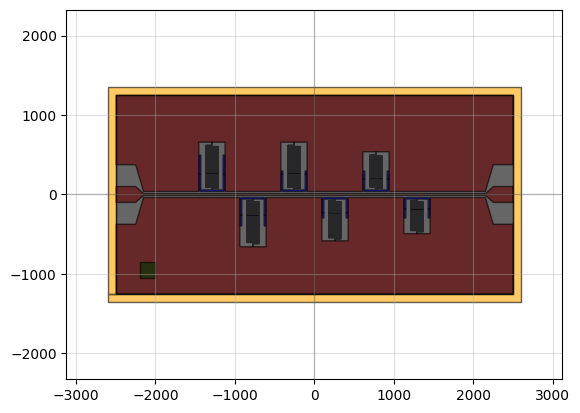

In [81]:
NumberOfResonators = int(6)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350,250, 250, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35,35,35, 30,27, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
#feedline
FeedlineWidth = 20
FeedlineLength  = 4300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 2500]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False
                        )


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])


chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/20241216_SiRes-Al/si_al_6resonator_fab.gds")
qp(chip)

### Now with three Tlines

In [ ]:
NumberOfResonators = int(4)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)

#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[550,350,250,250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35,35,30,24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 5000]

c, metal, chip = ChipResonatorsThreeTlines(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = False,
                        ypos_tlines = [1500, -500, -1900])


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/20241216_SiRes-Al/si_al_resonator_fab_threeTline.gds")
qp(chip)

NameError: name 'np' is not defined

Resonator 1
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 170.51865907883064 fF
 Cc: 0.897486035281895 fF
Resonator 2
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 132.6256237279794 fF
 Cc: 0.897486035281895 fF
Resonator 3
 Geometric: 6.786900799117165 nH/m
 Kinetic: 0.9991666666666666 nH/m
 Ltot: 7.78606746578383 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 4
 Geometric: 5.853530821409309 nH/m
 Kinetic: 0.8616666666666668 nH/m
 Ltot: 6.715197488075976 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 5
 Geometric: 5.293508834784594 nH/m
 Kinetic: 0.7791666666666667 nH/m
 Ltot: 6.07267550145126 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Resonator 6
 Geometric: 4.73348684815988 nH/m
 Kinetic: 0.6966666666666667 nH/m
 Ltot: 5.430153514826547 nH
 Cg: 94.73258837712814 fF
 Cc: 0.897486035281895 fF
Inductor total length is [5995. 5995. 

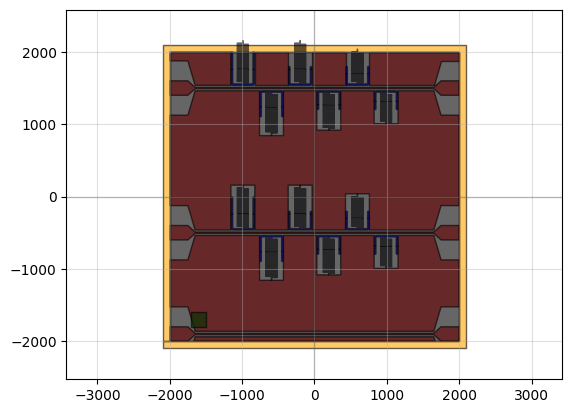

In [ ]:
NumberOfResonators = int(6)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350,250, 250, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35,35,35, 30,27, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 4000]

c, metal, chip = ChipResonatorsThreeTlines(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = False,
                        ypos_tlines = [1500, -500, -1900])


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/20241216_SiRes-Al/si_al_6resonator_fab_threeTline-4x4.gds")
qp(chip)

Resonator 1
Resonator 2
Resonator 3
Resonator 4
Resonator 5
Resonator 6
Inductor total length is [5995. 5995. 5995. 5170. 4675. 4180.]
The frequencies are [np.float64(4.356474619856999), np.float64(4.937532909491112), np.float64(5.836509925118195), np.float64(6.285838297722613), np.float64(6.610963148729782), np.float64(6.991966377668177)]


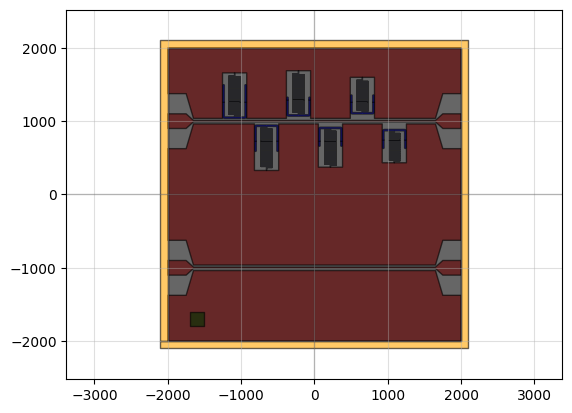

In [12]:
NumberOfResonators = int(6)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450,350,250, 250, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35,35,35, 30,27, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*[0,15,30,45,60,75] 
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)

#feedline
# FeedlineLength = 3300
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength, 4000]

c, metal, chip = ChipResonatorsTwoTlines(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = False,
                        ypos_tlines = [1000, -1000], EdgeResDistanceFactor=0.33)


il = round(InductorTotalLength[0])
cvl = round(CapacitorVerticalLength[0])

chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/20241216_SiRes-Al/si_al_6resonator_fab_twoTline-4x4.gds")
qp(chip)

Resonator 1
 Geometric: 0.6833283628353088 nH/m
 Kinetic: 110.00000000000001 nH/m
 Ltot: 110.68332836283533 nH
 Cg: 56.83955302627688 fF
 Cc: 0.358994414112758 fF
Resonator 2
 Geometric: 0.7658559428878824 nH/m
 Kinetic: 123.33333333333334 nH/m
 Ltot: 124.09918927622124 nH
 Cg: 56.83955302627688 fF
 Cc: 0.33634147209683096 fF
Resonator 3
 Geometric: 0.9309111029930295 nH/m
 Kinetic: 150.0 nH/m
 Ltot: 150.93091110299304 nH
 Cg: 56.83955302627688 fF
 Cc: 0.32030352969634385 fF
Resonator 4
 Geometric: 1.0418075386886754 nH/m
 Kinetic: 167.91666666666669 nH/m
 Ltot: 168.95847420535534 nH
 Cg: 56.83955302627688 fF
 Cc: 0.3080441286520322 fF
Resonator 5
 Geometric: 1.2558634494500378 nH/m
 Kinetic: 202.5 nH/m
 Ltot: 203.75586344945006 nH
 Cg: 56.83955302627688 fF
 Cc: 0.2981940159274564 fF
Resonator 6
 Geometric: 1.518920110867616 nH/m
 Kinetic: 245.00000000000003 nH/m
 Ltot: 246.51892011086764 nH
 Cg: 56.83955302627688 fF
 Cc: 0.2899956460600789 fF
Resonator 7
 Geometric: 1.8799782735976256

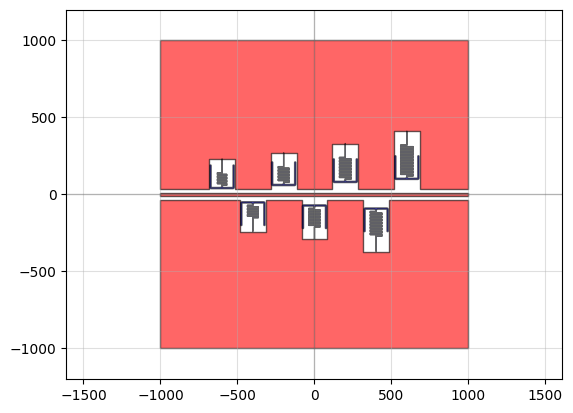

In [35]:
NumberOfResonators = int(7)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)
#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*150
CapacitorVerticalLength = np.ones(NumberOfResonators)*150
CapacitorWidth = np.ones(NumberOfResonators)*8
# 7p6 ; 7p2 ; 6p5 ; 5p8; 5p6 ; 5 ; 4p4
NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[7, 7, 9, 10, 12, 15, 18]
InductorVerticalLength = np.ones(NumberOfResonators)*10
InductorEndLength = np.ones(NumberOfResonators)*([70, 70, 70, 70,  80, 80, 80] )
InductorHorizontalLength = np.ones(NumberOfResonators)*[60,70, 70,  72.5, 75,  75, 80]
InductorWidth = np.ones(NumberOfResonators)*0.6
TaperWidth = np.ones(NumberOfResonators)*20
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1)


SpacingC0 = np.ones(NumberOfResonators)*5
SpacingCc = np.ones(NumberOfResonators)*[0, 10, 20, 30, 40, 50, 60]
TaperLength = np.ones(NumberOfResonators)*5
FinalSpacingBondpads = 100
#Resonator parameters
# CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
# CapacitorVerticalLength = np.ones(NumberOfResonators)*[550,350,250,250]
# CapacitorWidth = np.ones(NumberOfResonators)*20 
 

# NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[35,35,30,24]
# InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
# InductorEndLength = np.ones(NumberOfResonators)*[10] 
# InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
# InductorWidth = np.ones(NumberOfResonators)*[0.6] 
# TaperWidth = np.ones(NumberOfResonators)*20 
# InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
# SpacingC0 = np.ones(NumberOfResonators)*5 
# SpacingCc = np.ones(NumberOfResonators)*[0] 
# TaperLength = np.ones(NumberOfResonators)*5 
# FinalSpacingBondpads = 100

Lk = 100e-12
freqs = []
for i in range(NumberOfResonators):
    print(f'Resonator {i+1}')
    freqs.append(resonance_freq_Schuster(InductorWidth[i]*1e-6, CapacitorWidth[i]*1e-6, (SeparationTlineResonator[i] + FeedlineGap + SpacingCc[i])*1e-6 , FeedlineWidth*1e-6,
                                            CapacitorVerticalLength[i]*1e-6, SpacingC0[i]*1e-6,
                                            InductorWidth[i]*1e-6, InductorTotalLength[i]*1e-6, Lk,
                                        epsilon_r, thickness_subs)/1e9)                                        

print('Inductor total length is', InductorTotalLength)
print('The frequencies are', freqs)


FeedlineLength = 2000
ChipSize = [FeedlineLength, 2000] 

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=True)


#chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/2024122-SiRes-Al/si_al_resonator_fab.gds")
qp(chip)